# exploring_training_data.ipynb

This notebook will soley focus on exploring the training data to find some relationships. We will develop plots and try to see how we can decrease our feature set (189 features!).

In [18]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
# Getting the data
raw_data = pd.read_csv('/Users/jinalshah/Jinal/Projects/march-madness-mania/preprocessed-data/modeling-data/training.csv',index_col=0)

# Making sure the data loaded properly
raw_data.head()

,Season,lower_TeamID,lower_Wins,lower_Losses,lower_Winning Percentage,lower_Score_mean,lower_FGM_mean,lower_FGA_mean,lower_FGM3_mean,lower_FGA3_mean,...,higher_DRPercent_std,higher_AssistToTurnoverRatio_std,higher_Possessions_std,higher_OffEff_std,higher_DefEff_std,higher_TO%_std,higher_PointDiff_std,higher_OffensiveRating_std,higher_DefensiveRating_std,LowerWin?
1057,2019,1242,25,9,0.735294,75.382353,27.294118,59.058824,7.235294,20.647059,...,0.085358,0.881175,7.485740,25.135399,45.694237,0.139550,12.276641,62672.908339,241.659481,1
389,2009,1143,22,10,0.687500,75.031250,27.093750,55.906250,6.343750,14.625000,...,0.087454,0.483462,5.707081,24.857249,37.922101,0.101832,17.022045,56403.384404,586.620957,0
462,2010,1352,23,11,0.676471,68.500000,23.323529,53.323529,5.647059,15.470588,...,0.081245,0.435349,5.966921,31.325718,35.567874,0.129745,14.418477,66317.665445,600.246113,0
575,2011,1242,32,2,0.941176,82.382353,29.588235,57.617647,7.264706,18.764706,...,0.093195,0.540804,7.140057,34.335500,38.461804,0.152372,10.118593,49478.637137,459.165885,0
559,2011,1228,19,13,0.593750,71.281250,26.343750,56.343750,6.843750,17.687500,...,0.077266,0.637593,7.101537,35.161898,40.164503,0.164143,15.802057,79118.599885,797.290386,0


In [20]:
# Displaying data shape to see what we are working with
print(f'Data Shape: {raw_data.shape}')

Data Shape: (1606, 190)


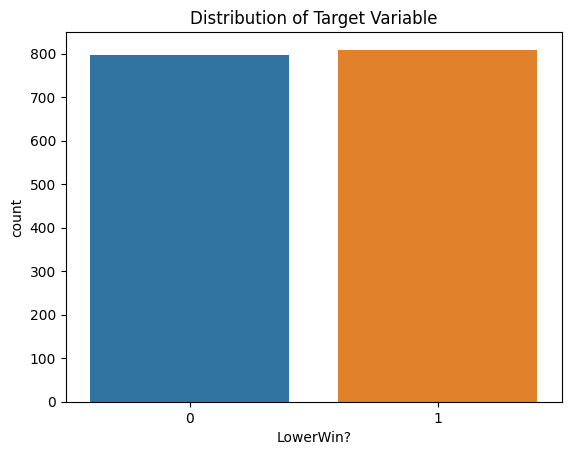

In [21]:
# Seeing what the distribution of lower team wins is (how many times did the lower team win?)
sns.countplot(data=raw_data,x='LowerWin?',orient='v')
plt.title('Distribution of Target Variable')
plt.savefig('/Users/jinalshah/Jinal/Projects/march-madness-mania/visualizations/target_dist.png')
plt.show()

In [22]:
# Seeing the actual counts because plot shows an even split
raw_data['LowerWin?'].value_counts()

1    809
0    797
Name: LowerWin?, dtype: int64

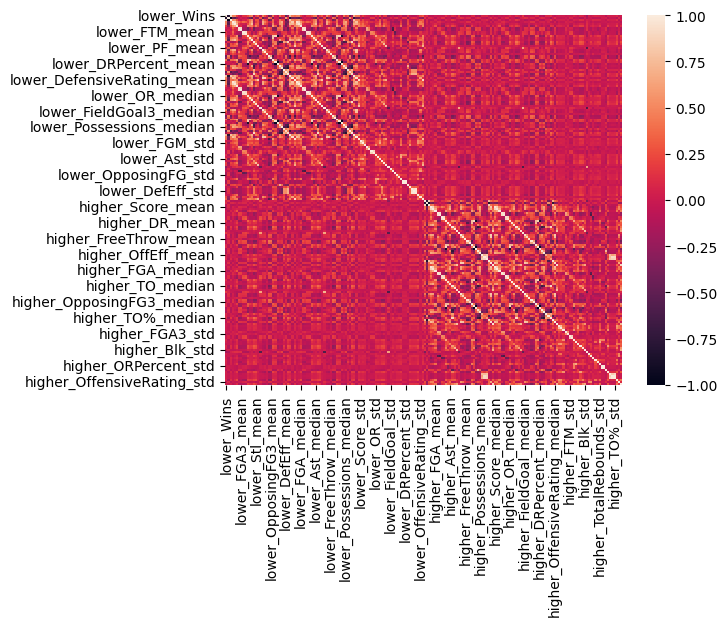

In [23]:
# Making a heatmap to see relationships between the numerical features (practically all of them)!
sns.heatmap(raw_data.drop(['LowerWin?','Season','lower_TeamID','higher_TeamID'],axis=1).corr())
plt.savefig('/Users/jinalshah/Jinal/Projects/march-madness-mania/visualizations/features_heatmap.png')
plt.show()

In [25]:
# Some correlations exist, probably running data through PCA is probably ideal.
# Adding a feature that identifies whether game is mens or womens since there is a difference in statistics for both leagues.
# See references for details.
raw_data['Bracket'] = "M"
raw_data.loc[raw_data['lower_TeamID'] > 3000,'Bracket'] = 'W'
raw_data 

,Season,lower_TeamID,lower_Wins,lower_Losses,lower_Winning Percentage,lower_Score_mean,lower_FGM_mean,lower_FGA_mean,lower_FGM3_mean,lower_FGA3_mean,...,higher_AssistToTurnoverRatio_std,higher_Possessions_std,higher_OffEff_std,higher_DefEff_std,higher_TO%_std,higher_PointDiff_std,higher_OffensiveRating_std,higher_DefensiveRating_std,LowerWin?,Bracket
1057,2019,1242,25,9,0.735294,75.382353,27.294118,59.058824,7.235294,20.647059,...,0.881175,7.485740,25.135399,45.694237,0.139550,12.276641,62672.908339,241.659481,1,M
389,2009,1143,22,10,0.687500,75.031250,27.093750,55.906250,6.343750,14.625000,...,0.483462,5.707081,24.857249,37.922101,0.101832,17.022045,56403.384404,586.620957,0,M
462,2010,1352,23,11,0.676471,68.500000,23.323529,53.323529,5.647059,15.470588,...,0.435349,5.966921,31.325718,35.567874,0.129745,14.418477,66317.665445,600.246113,0,M
575,2011,1242,32,2,0.941176,82.382353,29.588235,57.617647,7.264706,18.764706,...,0.540804,7.140057,34.335500,38.461804,0.152372,10.118593,49478.637137,459.165885,0,M
559,2011,1228,19,13,0.593750,71.281250,26.343750,56.343750,6.843750,17.687500,...,0.637593,7.101537,35.161898,40.164503,0.164143,15.802057,79118.599885,797.290386,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2018,3113,21,12,0.636364,67.757576,26.212121,59.030303,4.787879,14.303030,...,0.394660,7.128476,31.739010,35.282450,0.151375,18.460917,64197.162559,969.800930,0,W
37,2010,3246,25,7,0.781250,73.906250,25.562500,61.750000,5.218750,16.593750,...,0.432705,7.439978,42.402987,51.919358,0.287480,10.856444,75485.147307,912.526942,1,W
51,2010,3211,27,4,0.870968,80.935484,31.870968,66.677419,4.870968,15.096774,...,0.490341,7.446225,50.437501,46.587307,0.243025,14.217522,56137.951086,853.379532,0,W
596,2019,3390,28,4,0.875000,74.781250,27.781250,61.875000,8.906250,25.343750,...,0.518654,5.807309,33.189579,30.687668,0.133881,16.690558,60881.268832,646.177969,1,W


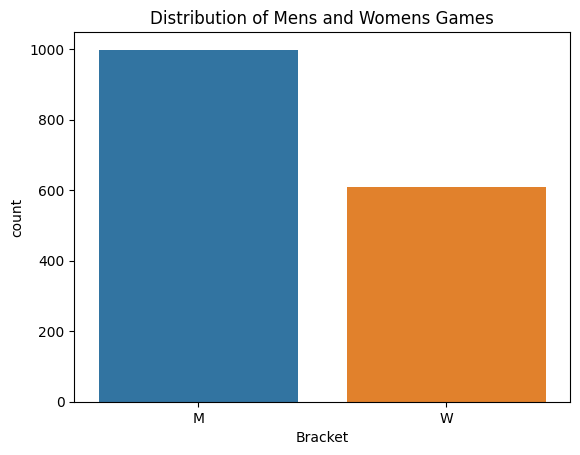

In [26]:
# Making sure I have an even split of mens and womens games
sns.countplot(data=raw_data,x='Bracket',orient='v')
plt.title('Distribution of Mens and Womens Games')
plt.savefig('/Users/jinalshah/Jinal/Projects/march-madness-mania/visualizations/bracket_games_dist.png')
plt.show()